In [1]:
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#from xgboost import XGBRegressor
from keras.utils.vis_utils import plot_model
from keras_visualizer import visualizer
import keras
from IPython.display import clear_output
import os
import tensorflow as tf
from sklearn.metrics import r2_score

In [2]:
os.chdir(r'C:\Users\SAEESResearchPC1\Desktop\New folder (3)')
LAI = pd.read_csv('Maize_Extracted_data.csv')
LAI.head()

,LAI,FMC,EWT,DMC,SLA1,SLA2,SLA3,Blue,Green,Red,...,CIrededge,CVI,GLI,EVI,EVI2,EVI3,IPVI,SAVI,OSAVI,SR
0,2.93,80.889973,274.312410,26.54,154.307815,0.015431,0.467305,0.019646,0.035389,0.043678,...,0.51,3.59,0.06,4.52,0.12,0.12,0.73,0.14,0.19,2.36
1,2.00,79.024390,229.421136,6.48,164.215116,0.016422,1.162791,0.023747,0.063375,0.053976,...,0.21,1.65,0.24,4.47,0.14,0.14,0.73,0.15,0.20,2.28
2,1.20,82.250471,291.399787,17.47,159.023873,0.015902,0.318302,0.034809,0.060572,0.040356,...,2.50,4.34,0.23,5.09,0.59,0.59,0.94,0.57,0.60,9.77
3,1.52,83.856749,274.224352,15.22,189.426621,0.018943,0.518771,0.028945,0.051587,0.074913,...,0.30,3.33,0.00,3.95,0.09,0.08,0.66,0.09,0.12,1.58
4,1.35,81.795968,252.989967,13.39,177.607383,0.017761,0.453020,0.038439,0.105935,0.047098,...,1.82,2.02,0.42,5.06,0.68,0.68,0.95,0.63,0.63,10.22


In [3]:
# Splitting the dataset into input (X) and output (y) variables
X = LAI.iloc[:, 1:].values
y = LAI.iloc[:, 0].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_shape = (32,), activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 103,297
Trainable params: 103,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/60
2/2 [==============================] - 1s 235ms/step - loss: 3.1667 - mse: 3.1667 - val_loss: 2.8635 - val_mse: 2.8635
Epoch 2/60
2/2 [==============================] - 0s 23ms/step - loss: 2.3124 - mse: 2.3124 - val_loss: 2.0029 - val_mse: 2.0029
Epoch 3/60
2/2 [==============================] - 0s 25ms/step - loss: 1.4739 - mse: 1.4739 - val_loss: 1.1011 - val_mse: 1.1011
Epoch 4/60
2/2 [==============================] - 0s 22ms/step - loss: 0.7089 - mse: 0.7089 - val_loss: 0.5443 - val_mse: 0.5443
Epoch 5/60
2/2 [==============================] - 0s 23ms/step - loss: 0.6272 - mse: 0.6272 - val_loss: 0.6315 - val_mse: 0.6315
Epoch 6/60
2/2 [==============================] - 0s 22ms/step - loss: 0.7762 - mse: 0.7762 - val_loss: 0.5034 - val_mse: 0.5034
Epoch 7/60
2/2 [==============================] - 0s 22ms/step - loss: 0.5223 - mse: 0.5223 - val_loss: 0.3749 - val_mse: 0.3749
Epoch 8/60
2/2 [==============================] - 0s 23ms/step - loss: 0.3190 - mse: 0.3190 - va

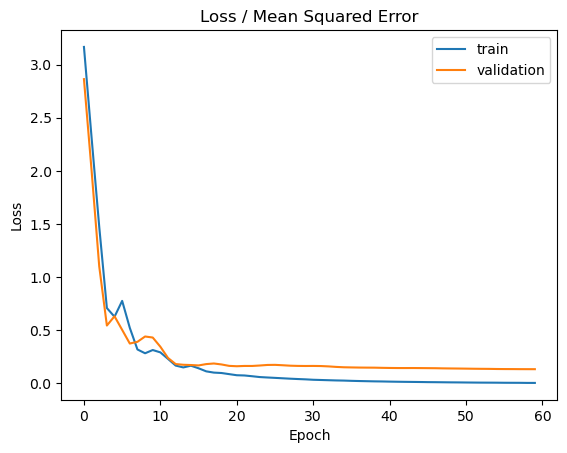

In [5]:
# Training the model
history = model.fit(X_train, y_train, epochs=60, batch_size= 32, validation_data=(X_test, y_test))

#plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [6]:
# Importing libraries for metrics calculation
from sklearn.metrics import mean_squared_error, r2_score

# Generating predictions
predictions = model.predict(X_train)

# Calculating RMSE, R-squared, and LCC
rmse = np.sqrt(mean_squared_error(y_train, predictions))
r2 = r2_score(y_train, predictions)
lcc = np.corrcoef(predictions.reshape(-1), y_train)[0, 1]

# Printing the results
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"LCC: {lcc:.4f}")

2/2 [==============================] - 0s 2ms/step
RMSE: 0.0661
R-squared: 0.9552
LCC: 0.9778


2/2 [==============================] - 0s 2ms/step


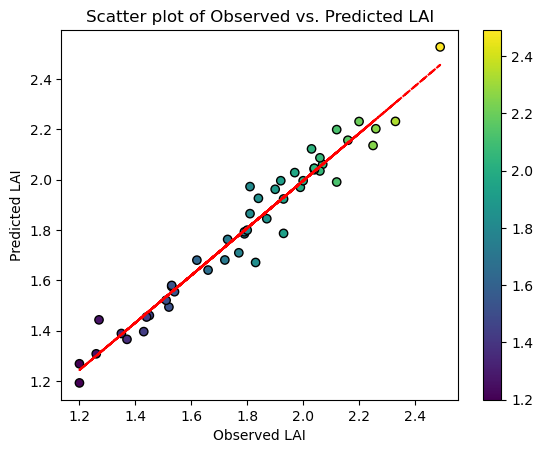

In [7]:
import matplotlib.pyplot as plt

# Generate predictions for test data
y_pred = model.predict(X_train)

ratio = y_train
ratio2 = y_pred

# Create scatter plot
plt.scatter(y_train, y_pred, c= ratio, edgecolor ='black', linewidth=1,   alpha=1)

# Add line of fit
z = np.polyfit(y_train, y_pred, 1)
p = np.poly1d(z.ravel())
plt.plot(y_train, p(y_train), "r--")

# Add axis labels
plt.xlabel('Observed LAI')
plt.ylabel('Predicted LAI')

# Add title
plt.title('Scatter plot of Observed vs. Predicted LAI')

# Add color density
plt.colorbar()

# Show plot
plt.show()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


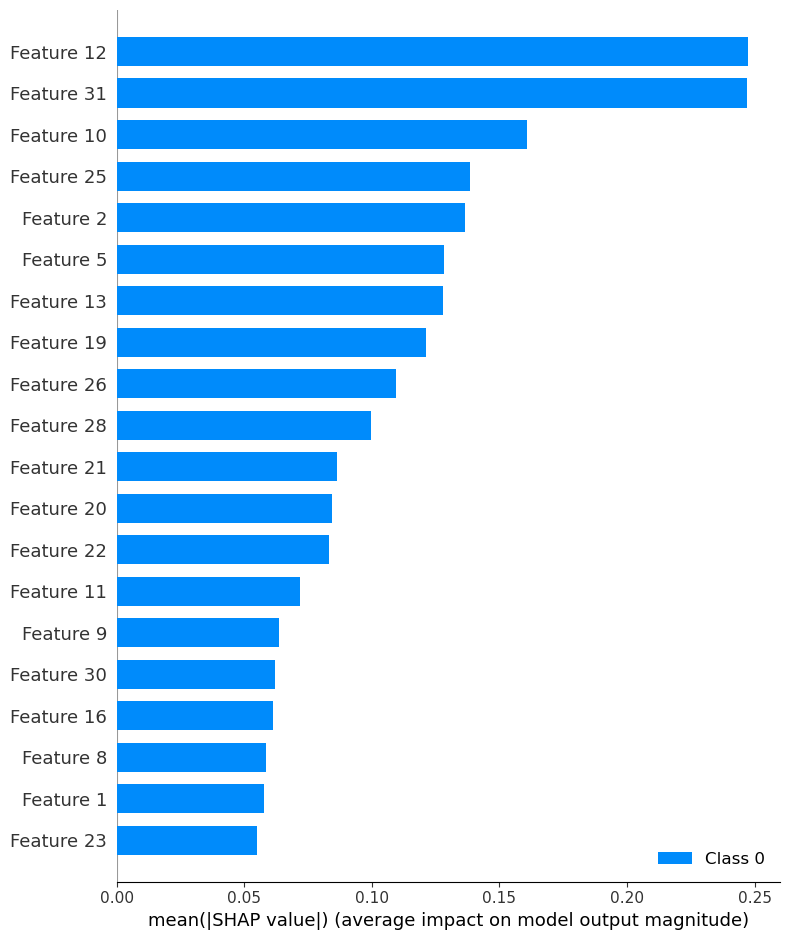

In [8]:
#SHAPELY TRIAL FOR DNN
import shap
background22 = X_train[np.random.choice(X_train.shape[0], 500, replace=True)]
explainer22 = shap.DeepExplainer(model,background22)
shap_values22 = explainer22.shap_values(X_train[1:17])
shap.summary_plot(shap_values22, X_train, plot_type='bar')

In [14]:
#rmse and r2score for train and test
from sklearn import metrics

In [15]:
rsq = metrics.r2_score(y_train, model.predict(X_train))
mse = metrics.mean_squared_error(y_train, model.predict(X_train))
rmse1 = np.sqrt(mse)
print(rsq, rmse1, mse)

2/2 [==============================] - 0s 1ms/step
0.9552415648708619 0.06605534057799443 0.004363308018874837


In [16]:
rsq = metrics.r2_score(y_test, model.predict(X_test))
mse = metrics.mean_squared_error(y_test, model.predict(X_test))
rmse1 = np.sqrt(mse)
print(rsq, rmse1, mse)

1/1 [==============================] - 0s 14ms/step
0.3672519429099812 0.3652218976265247 0.13338703450591968


In [12]:
from keras.layers import Dropout
from keras import regularizers

In [32]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), input_shape = (32,), activation='relu'))
Dropout(0.3)

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
Dropout(0.3)
NN_model.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
Dropout(0.3)
#NN_model.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#Dropout(0.3)
#NN_model.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#Dropout(0.3)
#NN_model.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#Dropout(0.3)


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
NN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               4224      
                                                                 
 dense_34 (Dense)            (None, 256)               33024     
                                                                 
 dense_35 (Dense)            (None, 256)               65792     
                                                                 
 dense_36 (Dense)            (None, 1)                 257       
                                                                 
Total params: 103,297
Trainable params: 103,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
2/2 [==============================] - 1s 112ms/step - loss: 5.6320 - mse: 3.0691 - val_loss: 5.2582 - val_mse: 2.7550
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 4.8100 - mse: 2.3185 - val_loss: 4.3096 - val_mse: 1.8734
Epoch 3/500
2/2 [==============================] - 0s 20ms/step - loss: 3.9519 - mse: 1.5266 - val_loss: 3.3116 - val_mse: 0.9369
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 3.1184 - mse: 0.7538 - val_loss: 2.6650 - val_mse: 0.3481
Epoch 5/500
2/2 [==============================] - 0s 20ms/step - loss: 2.8526 - mse: 0.5464 - val_loss: 2.6943 - val_mse: 0.4415
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 3.0064 - mse: 0.7659 - val_loss: 2.5693 - val_mse: 0.3879
Epoch 7/500
2/2 [==============================] - 0s 20ms/step - loss: 2.7437 - mse: 0.5749 - val_loss: 2.3769 - val_mse: 0.2683
Epoch 8/500
2/2 [==============================] - 0s 19ms/step - loss: 2.4123 - mse: 0.3

2/2 [==============================] - 0s 20ms/step - loss: 0.1674 - mse: 0.0071 - val_loss: 0.2483 - val_mse: 0.0897
Epoch 126/500
2/2 [==============================] - 0s 20ms/step - loss: 0.1659 - mse: 0.0079 - val_loss: 0.2464 - val_mse: 0.0900
Epoch 127/500
2/2 [==============================] - 0s 21ms/step - loss: 0.1638 - mse: 0.0076 - val_loss: 0.2431 - val_mse: 0.0883
Epoch 128/500
2/2 [==============================] - 0s 20ms/step - loss: 0.1615 - mse: 0.0072 - val_loss: 0.2409 - val_mse: 0.0883
Epoch 129/500
2/2 [==============================] - 0s 19ms/step - loss: 0.1593 - mse: 0.0071 - val_loss: 0.2393 - val_mse: 0.0886
Epoch 130/500
2/2 [==============================] - 0s 20ms/step - loss: 0.1571 - mse: 0.0067 - val_loss: 0.2376 - val_mse: 0.0886
Epoch 131/500
2/2 [==============================] - 0s 19ms/step - loss: 0.1557 - mse: 0.0070 - val_loss: 0.2353 - val_mse: 0.0882
Epoch 132/500
2/2 [==============================] - 0s 21ms/step - loss: 0.1535 - mse: 0.

2/2 [==============================] - 0s 21ms/step - loss: 0.0644 - mse: 0.0039 - val_loss: 0.1421 - val_mse: 0.0817
Epoch 250/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0643 - mse: 0.0039 - val_loss: 0.1419 - val_mse: 0.0818
Epoch 251/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0639 - mse: 0.0039 - val_loss: 0.1424 - val_mse: 0.0828
Epoch 252/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0638 - mse: 0.0042 - val_loss: 0.1418 - val_mse: 0.0822
Epoch 253/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0634 - mse: 0.0038 - val_loss: 0.1415 - val_mse: 0.0820
Epoch 254/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0634 - mse: 0.0040 - val_loss: 0.1413 - val_mse: 0.0822
Epoch 255/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0629 - mse: 0.0038 - val_loss: 0.1408 - val_mse: 0.0819
Epoch 256/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0627 - mse: 0.

2/2 [==============================] - 0s 19ms/step - loss: 0.0476 - mse: 0.0029 - val_loss: 0.1181 - val_mse: 0.0735
Epoch 374/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0477 - mse: 0.0030 - val_loss: 0.1180 - val_mse: 0.0733
Epoch 375/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0475 - mse: 0.0027 - val_loss: 0.1202 - val_mse: 0.0755
Epoch 376/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0479 - mse: 0.0033 - val_loss: 0.1204 - val_mse: 0.0760
Epoch 377/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0478 - mse: 0.0033 - val_loss: 0.1185 - val_mse: 0.0738
Epoch 378/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0478 - mse: 0.0031 - val_loss: 0.1192 - val_mse: 0.0747
Epoch 379/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0473 - mse: 0.0029 - val_loss: 0.1203 - val_mse: 0.0763
Epoch 380/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0474 - mse: 0.

2/2 [==============================] - 0s 20ms/step - loss: 0.0430 - mse: 0.0032 - val_loss: 0.1114 - val_mse: 0.0714
Epoch 498/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0430 - mse: 0.0030 - val_loss: 0.1104 - val_mse: 0.0704
Epoch 499/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0430 - mse: 0.0031 - val_loss: 0.1103 - val_mse: 0.0705
Epoch 500/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0431 - mse: 0.0032 - val_loss: 0.1094 - val_mse: 0.0694


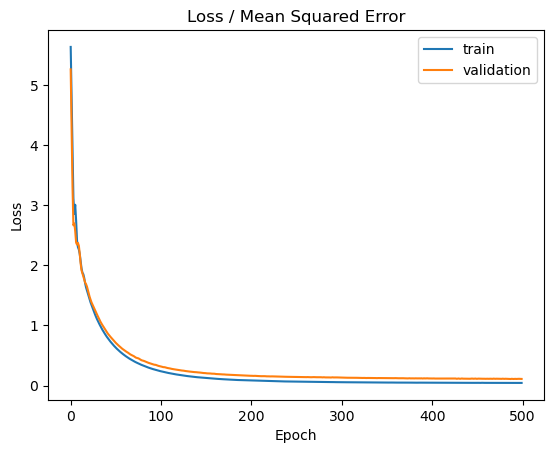

In [33]:
history = NN_model.fit(X_train, y_train, epochs=500, batch_size=32,  validation_data=(X_test, y_test)) #callbacks=callbacks_list)

#plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [34]:
# Generating predictions
predictions = NN_model.predict(X_train)

# Calculating RMSE, R-squared, and LCC
rmse = np.sqrt(mean_squared_error(y_train, predictions))
r2 = r2_score(y_train, predictions)
lcc = np.corrcoef(predictions.reshape(-1), y_train)[0, 1]

# Printing the results
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"LCC: {lcc:.4f}")

2/2 [==============================] - 0s 1ms/step
RMSE: 0.0534
R-squared: 0.9708
LCC: 0.9900


2/2 [==============================] - 0s 2ms/step


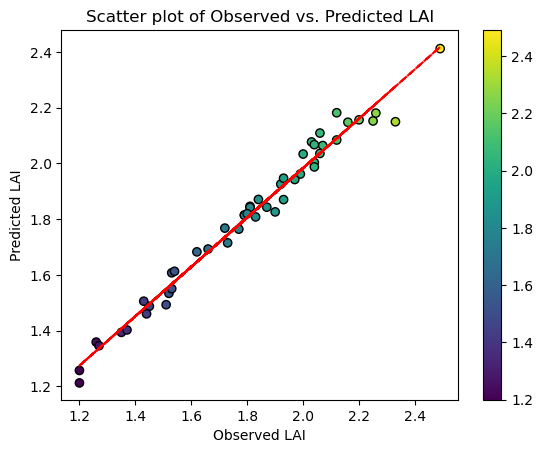

In [35]:
import matplotlib.pyplot as plt

# Generate predictions for test data
y_pred = NN_model.predict(X_train)

ratio = y_train
ratio2 = y_pred

# Create scatter plot
plt.scatter(y_train, y_pred, c= ratio, edgecolor ='black', linewidth=1,   alpha=1)

# Add line of fit
z = np.polyfit(y_train, y_pred, 1)
p = np.poly1d(z.ravel())
plt.plot(y_train, p(y_train), "r--")

# Add axis labels
plt.xlabel('Observed LAI')
plt.ylabel('Predicted LAI')

# Add title
plt.title('Scatter plot of Observed vs. Predicted LAI')

# Add color density
plt.colorbar()

# Show plot
plt.show()

In [36]:
rsq = metrics.r2_score(y_test, NN_model.predict(X_test))
mse = metrics.mean_squared_error(y_test, NN_model.predict(X_test))
rmse1 = np.sqrt(mse)
print(rsq, rmse1, mse)

1/1 [==============================] - 0s 13ms/step
0.6708444999880687 0.2634158823385478 0.06938792706819566


In [51]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.41699287, 0.35777863, 0.80887097, ..., 0.07936508, 0.12280702,
        0.04350251],
       [0.30843563, 0.20476329, 0.        , ..., 0.0952381 , 0.14035088,
        0.03904071],
       [0.49615953, 0.41602225, 0.44314516, ..., 0.76190476, 0.84210526,
        0.45677635],
       ...,
       [0.54409127, 0.1339218 , 0.49274194, ..., 0.3015873 , 0.42105263,
        0.16229782],
       [0.37170467, 0.17211784, 0.49072581, ..., 0.26984127, 0.36842105,
        0.12493028],
       [0.43966038, 0.24614608, 0.50201613, ..., 0.80952381, 0.87719298,
        0.56553263]])

In [52]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.2, random_state=2)

In [53]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [54]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(49, 32) (6, 32) (7, 32) (49,) (6,) (7,)


In [60]:
NN_model2 = Sequential()

# The Input Layer :
NN_model2.add(Dense(128, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), input_shape = (32,), activation='relu'))
Dropout(0.3)

# The Hidden Layers :
NN_model2.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
Dropout(0.3)
NN_model2.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
Dropout(0.3)
NN_model2.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
Dropout(0.3)
#NN_model2.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#Dropout(0.3)
#NN_model2.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#Dropout(0.3)


# The Output Layer :
NN_model2.add(Dense(1, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='linear'))

# Compile the network :
NN_model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
NN_model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 128)               4224      
                                                                 
 dense_63 (Dense)            (None, 256)               33024     
                                                                 
 dense_64 (Dense)            (None, 256)               65792     
                                                                 
 dense_65 (Dense)            (None, 256)               65792     
                                                                 
 dense_66 (Dense)            (None, 1)                 257       
                                                                 
Total params: 169,089
Trainable params: 169,089
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
2/2 [==============================] - 1s 118ms/step - loss: 7.4236 - mse: 3.2604 - val_loss: 7.1653 - val_mse: 3.1739
Epoch 2/200
2/2 [==============================] - 0s 21ms/step - loss: 6.8220 - mse: 2.8651 - val_loss: 6.4996 - val_mse: 2.7031
Epoch 3/200
2/2 [==============================] - 0s 21ms/step - loss: 6.0603 - mse: 2.2957 - val_loss: 5.6164 - val_mse: 1.9994
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 5.0590 - mse: 1.4713 - val_loss: 4.6405 - val_mse: 1.1883
Epoch 5/200
2/2 [==============================] - 0s 20ms/step - loss: 4.0579 - mse: 0.6326 - val_loss: 4.2764 - val_mse: 0.9769
Epoch 6/200
2/2 [==============================] - 0s 20ms/step - loss: 3.8976 - mse: 0.6247 - val_loss: 4.5304 - val_mse: 1.3854
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 4.0199 - mse: 0.9018 - val_loss: 4.0055 - val_mse: 1.0140
Epoch 8/200
2/2 [==============================] - 0s 21ms/step - loss: 3.4917 - mse: 0.5

2/2 [==============================] - 0s 21ms/step - loss: 0.2594 - mse: 0.0538 - val_loss: 0.4609 - val_mse: 0.2570
Epoch 126/200
2/2 [==============================] - 0s 20ms/step - loss: 0.2571 - mse: 0.0535 - val_loss: 0.4540 - val_mse: 0.2520
Epoch 127/200
2/2 [==============================] - 0s 21ms/step - loss: 0.2550 - mse: 0.0533 - val_loss: 0.4521 - val_mse: 0.2518
Epoch 128/200
2/2 [==============================] - 0s 21ms/step - loss: 0.2535 - mse: 0.0535 - val_loss: 0.4479 - val_mse: 0.2494
Epoch 129/200
2/2 [==============================] - 0s 20ms/step - loss: 0.2511 - mse: 0.0529 - val_loss: 0.4399 - val_mse: 0.2435
Epoch 130/200
2/2 [==============================] - 0s 20ms/step - loss: 0.2498 - mse: 0.0538 - val_loss: 0.4358 - val_mse: 0.2413
Epoch 131/200
2/2 [==============================] - 0s 20ms/step - loss: 0.2475 - mse: 0.0532 - val_loss: 0.4464 - val_mse: 0.2530
Epoch 132/200
2/2 [==============================] - 0s 21ms/step - loss: 0.2448 - mse: 0.

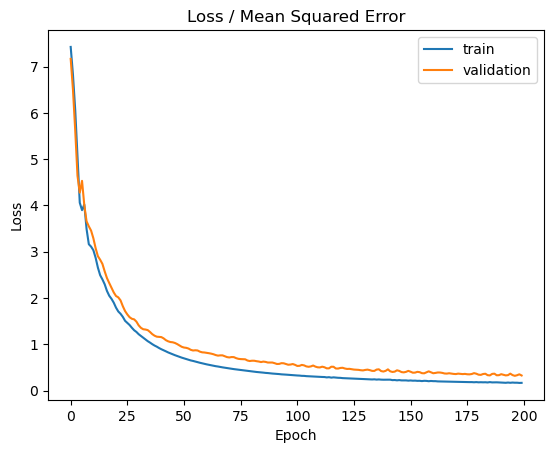

In [61]:
history = NN_model2.fit(X_train, Y_train, epochs=200, batch_size=32,  validation_data=(X_val, Y_val)) #callbacks=callbacks_list)

#plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [62]:
# Generating predictions
predictions = NN_model2.predict(X_train)

# Calculating RMSE, R-squared, and LCC
rmse = np.sqrt(mean_squared_error(Y_train, predictions))
r2 = r2_score(Y_train, predictions)
lcc = np.corrcoef(predictions.reshape(-1), Y_train)[0, 1]

# Printing the results
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"LCC: {lcc:.4f}")

2/2 [==============================] - 0s 2ms/step
RMSE: 0.2057
R-squared: 0.6246
LCC: 0.8438


In [63]:
rsq = metrics.r2_score(Y_test, NN_model2.predict(X_test))
mse = metrics.mean_squared_error(Y_test, NN_model2.predict(X_test))
rmse1 = np.sqrt(mse)
print(rsq, rmse1, mse)

1/1 [==============================] - 0s 13ms/step
-0.11634540921629477 0.24893485390999429 0.0619685614911902
